In [1]:
import numpy as np

import matplotlib.pyplot as plt

plt.style.use("seaborn-dark")

In [2]:
def func(x: float, y: float) -> float:
    return (1 - y**2) / (4 * x * y - 3)
    # return np.tan(y-2*x)
    # return (x**2*np.e**(-y)+2)/x

In [3]:
def result(y: float) -> float:
    # return 2*x + np.arctan(2)
    # return np.log(x**2*np.log(x))
    return (y**3 - 3 * y + 20) / (y**2 - 1) ** 2

In [4]:
def MRK4(x, y, h):
    k1 = h * func(x, y)
    k2 = h * func(x + h / 2, y + k1 / 2)
    k3 = h * func(x + h / 2, y + k2 / 2)
    k4 = h * func(x + h, y + k3)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [5]:
interval = [1, 2]
parameter = 0

In [12]:
xold = interval[0]
yold = 2.5151301
n = 20
h = (interval[1] - interval[0]) / n
pred_points = [[xold, yold]]
true_points = [[result(2.7), 2.7]]

for i in np.arange(1, n):
    yold += MRK4(xold, yold, h)
    xold += h
    pred_points.append([xold, yold])

pred_points = np.array(pred_points)

for i in np.arange(2.7, 2.0, -0.001):
    true_points.append([result(i), i])
true_points = np.array(true_points)

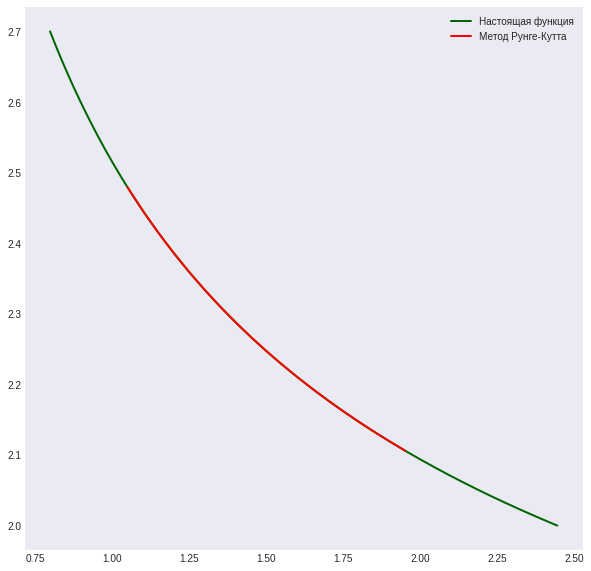

In [13]:
figure = plt.figure(figsize=(10, 10))
plt.plot(
    true_points[1:, 0],
    true_points[1:, 1],
    linewidth=2,
    color="darkgreen",
    label="Настоящая функция",
)
plt.plot(
    pred_points[1:, 0],
    pred_points[1:, 1],
    linewidth=2,
    color="red",
    label="Метод Рунге-Кутта",
)
plt.legend(loc="best")
figure.show()

In [14]:
def find_discrepancy(pred_points, h):
    errors = []
    # x = 0
    for point in pred_points:
        real_x = result(point[1])
        errors.append(np.abs(real_x - point[0]))
    return np.array(errors)

In [15]:
errors = find_discrepancy(pred_points, h)

In [17]:
max_error = errors.max()
print("Max error:", max_error)
mean_error = errors.mean()
print("Mean error:", mean_error)

Max error: 2.4268826719353598e-06
Mean error: 1.70439524996846e-06


In [22]:
def compare(n):
    xold = interval[0]
    yold = 2.5151301
    h = (interval[1] - interval[0]) / n
    pred_points_1 = [[xold, yold]]
    for i in np.arange(1, n):
        yold += MRK4(xold, yold, h)
        xold += h
        pred_points_1.append([xold, yold])

    pred_points_1 = np.array(pred_points_1)

    xold = interval[0]
    yold = 2.5151301
    n *= 2
    h = (interval[1] - interval[0]) / n
    pred_points_2 = [[xold, yold]]
    for i in np.arange(1, n):
        yold += MRK4(xold, yold, h)
        xold += h
        pred_points_2.append([xold, yold])

    pred_points_2 = np.array(pred_points_2)

    for idx, point in enumerate(pred_points_1):
        print(np.abs(point[1] - pred_points_2[idx * 2][1]))
        if np.abs(point[1] - pred_points_2[idx * 2][1]) > 0.01:
            print("Error", point, pred_points_2[idx * 2])
    print("Ok")


compare(10)

0.0
1.251106231947574e-07
1.9097086800812235e-07
2.2673500188474804e-07
2.463265138530346e-07
2.568292050142418e-07
2.620410524123429e-07
2.640895715444458e-07
2.642112248985029e-07
2.6314718715170216e-07
Ok
